In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir("C:\\Users\\Dinesh\\Desktop\\DataSets")

In [3]:
data=pd.read_csv('diabetes.csv')

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,pos
1,1,85,66,29,0,26.6,0.351,31,neg
2,8,183,64,0,0,23.3,0.672,32,pos
3,1,89,66,23,94,28.1,0.167,21,neg
4,0,137,40,35,168,43.1,2.288,33,pos


In [5]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diabetes                    0
dtype: int64

In [6]:
data['Diabetes'].value_counts()

neg    500
pos    268
Name: Diabetes, dtype: int64

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
from sklearn import preprocessing

In [9]:
knn=KNeighborsClassifier()

In [10]:
data['Diabetes'].replace(['pos','neg'],[1,0],inplace=True)

In [11]:
import seaborn as sns

In [12]:
x=data.iloc[:,:-1]

In [13]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [14]:
y=data.iloc[:,-1]

In [15]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Diabetes, dtype: int64

C:\Users\Dinesh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


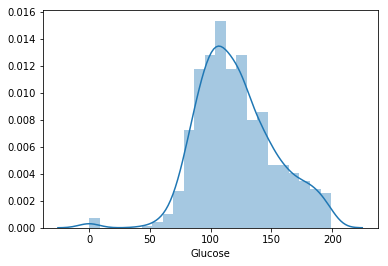

In [16]:
sns.distplot(data['Glucose'])

In [17]:
x.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [18]:
x.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


In [19]:
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))

In [20]:
x=pd.DataFrame(minmax.fit(x).transform(x))

In [21]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
x.head()

,0,1,2,3,4,5,6,7
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [23]:
from sklearn import cross_validation,neighbors
from sklearn.cross_validation import train_test_split

C:\Users\Dinesh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [25]:
y_train=y_train.astype('int')

In [26]:
clf = neighbors.KNeighborsClassifier()

In [27]:
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [28]:
clf.score(x_test,y_test)

0.7337662337662337

In [29]:
y_pred=clf.predict(x_test)

In [30]:
y_test.values

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
      dtype=int64)

In [31]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [32]:
clf.score(x_train,y_train)

0.8289902280130294

In [33]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix

In [34]:
accuracy_score(y_test,y_pred)

0.7337662337662337

In [35]:
recall_score(y_test,y_pred)

0.509090909090909

In [36]:
roc_auc_score(y_test,y_pred)

0.6838383838383838

In [37]:
confusion_matrix(y_test,y_pred)

array([[85, 14],
       [27, 28]], dtype=int64)

In [38]:
probas = clf.predict_proba(x_test)

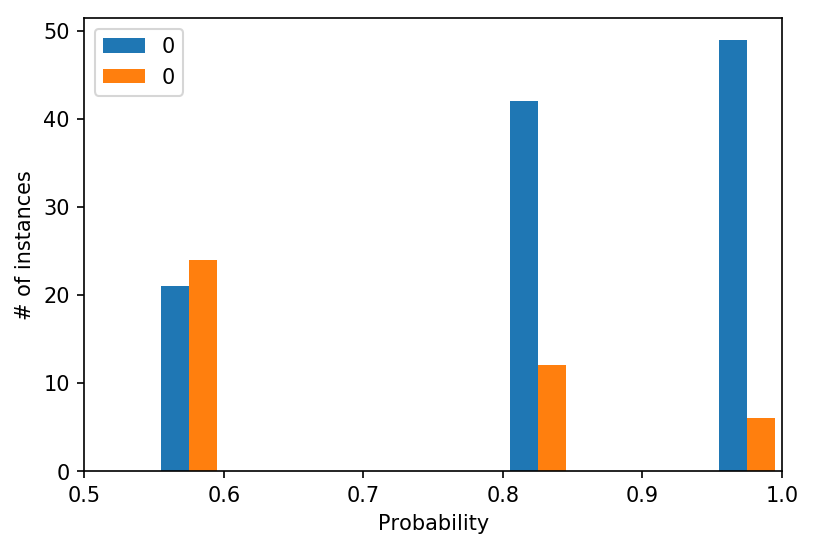

In [39]:
plt.figure(dpi=150)
plt.hist(probas,bins=20)
plt.xlabel('Probability')
plt.ylabel('# of instances')
plt.xlim([0.5,1.0])
plt.legend(y_test)
plt.show()

In [40]:
x_train_std = minmax.fit_transform(x_train)
x_test_std = minmax.transform(x_test)

In [41]:
from sklearn.model_selection import cross_val_score,cross_val_predict

In [42]:
clf_acc = cross_val_score(clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=1)

In [43]:
clf_proba = cross_val_predict(clf,x_train_std,y_train,cv=3,method="predict_proba")

In [44]:
clf_scores = clf_proba[:,1]

In [45]:
clf_acc

array([0.72195122, 0.73170732, 0.74509804])

# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lr=LogisticRegression()

In [48]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
lr.score(x_test,y_test)


0.7662337662337663

In [50]:
lr_acc = cross_val_score(lr,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=1)

In [51]:
lr_acc

array([0.71707317, 0.79512195, 0.74509804])

In [52]:
lr_proba = cross_val_predict(lr,x_train_std,y_train,cv=3,method="predict_proba")

In [53]:
lr_scores = lr_proba[:,1]

In [54]:
clf_acc

array([0.72195122, 0.73170732, 0.74509804])

In [55]:
y_pred = lr.predict(x_test)

In [56]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix

In [57]:
accuracy_score(y_test,y_pred)

0.7662337662337663

In [58]:
recall_score(y_test,y_pred)

0.45454545454545453

In [59]:
roc_auc_score(y_test,y_pred)

0.696969696969697

In [60]:
confusion_matrix(y_test,y_pred)

array([[93,  6],
       [30, 25]], dtype=int64)

# SVM

In [61]:
from sklearn.svm import SVC

In [62]:
svc = SVC(kernel='rbf',probability=True)

In [63]:
svc_classifier = svc.fit(x_train,y_train)

In [64]:
svc.score(x_test,y_test)

0.7597402597402597

In [65]:
svc_acc = cross_val_score(svc_classifier,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=1)

In [66]:
svc_acc

array([0.73170732, 0.7804878 , 0.71568627])

In [67]:
svc_proba = cross_val_predict(svc_classifier,x_train_std,y_train,cv=3,method="predict_proba")

In [68]:
svc_scores = svc_proba[:,1]

In [69]:
y_pred = svc.predict(x_test)

In [70]:
accuracy_score(y_test,y_pred)

0.7597402597402597

In [71]:
recall_score(y_test,y_pred)

0.41818181818181815

In [72]:
roc_auc_score(y_test,y_pred)

0.6838383838383838

In [73]:
confusion_matrix(y_test,y_pred)

array([[94,  5],
       [32, 23]], dtype=int64)

# Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
dtc_clf = DecisionTreeClassifier()

In [76]:
dtc_clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [77]:
dtc_clf.score(x_test,y_test)

0.6818181818181818

In [78]:
y_pred = dtc_clf.predict(x_test)

In [79]:
dtc_acc = cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=1)

In [80]:
dtc_acc

array([0.67317073, 0.72682927, 0.71078431])

In [81]:
dtc_proba = cross_val_predict(dtc_clf,x_train_std,y_train,cv=3,method="predict_proba")

In [82]:
dtc_clf_scores = dtc_proba[:,1]

In [83]:
recall_score(y_test,y_pred)

0.4909090909090909

In [84]:
roc_auc_score(y_test,y_pred)

0.6393939393939394

In [85]:
confusion_matrix(y_test,y_pred)

array([[78, 21],
       [28, 27]], dtype=int64)

In [86]:
accuracy_score(y_test,y_pred)

0.6818181818181818

# Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rmf = RandomForestClassifier(max_depth=7,random_state=0)

In [89]:
rmf_clf = rmf.fit(x_train,y_train)

In [90]:
rmf_clf.score(x_test,y_test)

0.7987012987012987

In [91]:
y_pred = rmf_clf.predict(x_test)

In [92]:
rmf_acc = cross_val_score(rmf_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=1)

In [93]:
rmf_acc

array([0.71219512, 0.77073171, 0.71568627])

In [94]:
rmf_proba = cross_val_predict(rmf_clf,x_train_std,y_train,cv=3,method="predict_proba")

In [95]:
rmf_clf_scores = rmf_proba[:,1]

In [96]:
recall_score(y_test,y_pred)

0.5454545454545454

In [97]:
roc_auc_score(y_test,y_pred)

0.7424242424242424

In [98]:
confusion_matrix(y_test,y_pred)

array([[93,  6],
       [25, 30]], dtype=int64)

In [99]:
accuracy_score(y_test,y_pred)

0.7987012987012987

# Boosting

In [100]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve

In [101]:
def ROC_curve(title,y_train,scores,label=None):
    fpr,tpr,thersholds = roc_curve(y_train,scores)
    print('AUC Score ({}):{:.2f}'.format(title,roc_auc_score(y_train,scores)))
    plt.figure(figsize=(8,6))
    plt.plot(fpr,tpr,linewidth=2,label=label,color='b')
    plt.xlabel('False Positive Rate',fontsize=16)
    plt.ylabel('True Positive Rate',fontsize=16)
    plt.title('ROC Curve: {}'.format(title),fontsize=16)

AUC Score (KNN):0.78
AUC Score (Logistic Regression):0.82
AUC Score (SVC):0.83
AUC Score (Decision Trees):0.66
AUC Score (Random Forest):0.77


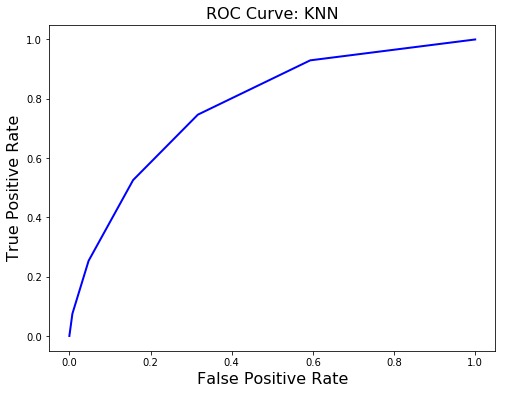

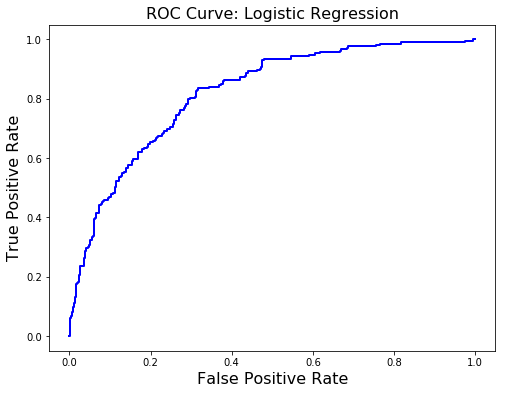

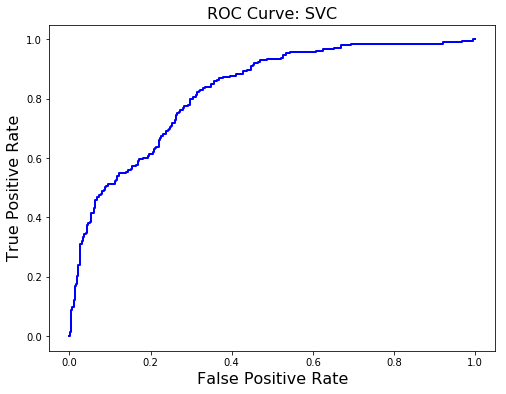

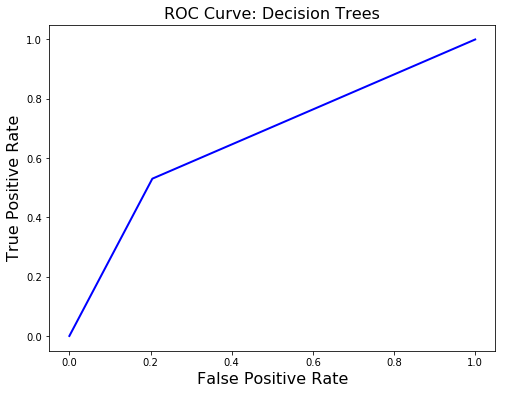

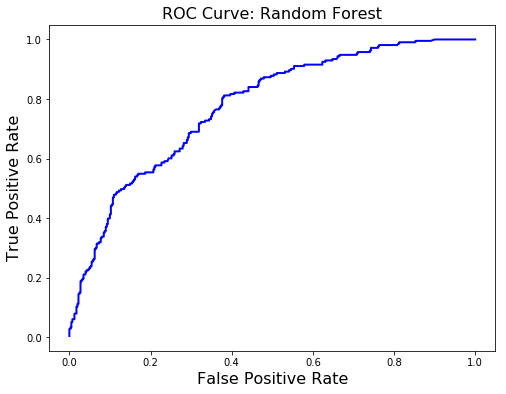

In [102]:
ROC_curve('KNN',y_train,clf_scores)
ROC_curve('Logistic Regression',y_train,lr_scores)
ROC_curve('SVC',y_train,svc_scores)
ROC_curve('Decision Trees',y_train,dtc_clf_scores)
ROC_curve('Random Forest',y_train,rmf_clf_scores)